<IPython.core.display.Javascript object>


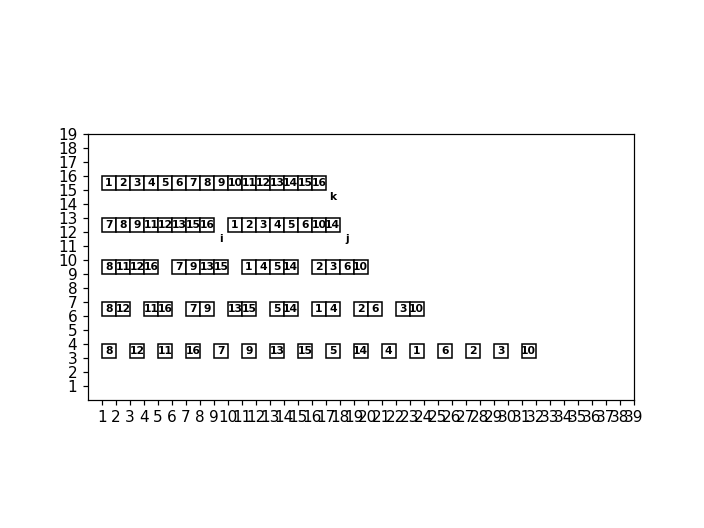

VBox()

init


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
from matplotlib.patches import PathPatch
from matplotlib.patches import Path
from matplotlib.transforms import Bbox
import random 
%matplotlib nbagg 

class partir_arreglo: 
    def __init__(self,arr): 
        info = self.dibujar_arreglo(arr,1,current_y)
        niveles.append([(arr,info)])
    #tenemos que saber donde esta el ultimo nivel 
    #la forma de los niveles es i con el arreglo y luego en el segundo esta la información 
    #que es el rectángulo y la anotación
    def dibujar_arreglo(self,arr,x,y):
        info = [[] for i in range(0,len(arr))]
        for i in range(0,len(arr)): 
            r = Rectangle((x, y), width, height,edgecolor = 'black',facecolor = 'white')
            ax.add_patch(r)
            rx, ry = r.get_xy()
            cx = rx + r.get_width()/2.0
            cy = ry + r.get_height()/2.0
            anot = ax.annotate(str(arr[i]), (cx, cy), color='black', weight='bold', fontsize=7, ha='center', va='center')
            info[i] = [r,anot]
            x = x + width
        
        return info
    
    def next_button_handler(self,event):  
        global current_y 
        x = 1
        nuevo_nivel = []
        for (a,_) in niveles[len(niveles)-1]: 
            a1 = [a[i] for i in range(0,len(a)//2)] 
            a2  = [a[i] for i in range(len(a)//2,len(a))] 
            inf1 = self.dibujar_arreglo(a1,x,current_y - 3*width)
            x = x +((len(a1)+1)*width)
            inf2 = self.dibujar_arreglo(a2,x,current_y - 3*width)
            x = x +((len(a1)+1)*width)
            nuevo_nivel.append((a1,inf1))
            nuevo_nivel.append((a2,inf2))
        niveles.append(nuevo_nivel) 
        current_y = current_y - 3*height 
        if(2**(len(niveles) -1)== len(complete_array)):
            estado = merge()
            estado.main()
        #actualizar posicion de nivel

    def main(self):
        next_button = widgets.Button(description='siguiente')
        controles.children = [next_button]
        next_button.on_click(self.next_button_handler)
    
class merge:
  
    def __init__(self): 
          #tengo que decir el nivel y los dos que voy a juntar
        global niveles
        self.lev = len(niveles)-1; 
        self.ind = 0 
        self.i_ind = 0 
        self.j_ind = 0
        self.k_ind = 0 
        self.anotaciones = []
        self.indices_i = [0 for i in range(0,len(niveles[self.lev]))]
        self.indices_j = [0 for i in range(0,len(niveles[self.lev]))]
        self.indices_k = [0 for i in range(0,len(niveles[self.lev-1]))]
        #todos los niveles ponlos en 0 
        for i in range(0,len(niveles)-1): 
            for (a,inf) in niveles[i]:
                for j in range(0,len(inf)): 
                    inf[j][1].set(text = "")
        self.poner_anotaciones_ind()
        print("init")
        
   
    def len_arr(self,lev,i): 
        return len(niveles[lev][i][0])

            
  
   
    def poner_anotaciones_ind(self): 
        for a in self.anotaciones: 
            a.set(visible = False)
        anotaciones = [] 
        for l in range(0,len(niveles[self.lev]),2): 
            arr1 = niveles[self.lev][l]
            arr2 = niveles[self.lev][l+1]
            arr3 = niveles[self.lev-1][l//2]
            i = self.indices_i[l]
            j = self.indices_j[l]
            k = self.indices_k[l//2] 
            if(i == len(arr1[0])): 
                r1 = arr1[1][len(arr1[0])-1][0]
                x1,y1 = r1.get_xy() 
                x1 = x1 + width*1.5  
                y1 = y1 - width/2 
            else: 
                r1 = arr1[1][i][0] 
                x1,y1 = r1.get_xy()
                x1 = x1 + width/2
                y1 = y1 - width/2
            ##arreglo 2 
            if(j == len(arr2[0])): 
                r2 = arr2[1][len(arr2[0])-1][0]
                x2,y2 = r2.get_xy() 
                x2 = x2 + width*1.5  
                y2 = y2 - width/2 
            else: 
                r2 = arr2[1][j][0]  
                x2,y2 = r2.get_xy()
                x2 = x2 + width/2 
                y2 = y2 - width/2
            #arreglo 3 
            if(k == len(arr3[0])): 
                r3 = arr3[1][len(arr3[0])-1][0]
                x3,y3 = r3.get_xy() 
                x3 = x3 + width*1.5  
                y3 = y3 - width/2 
            else: 
                r3 = arr3[1][k][0]
                x3,y3 = r3.get_xy() 
                x3 = x3 + width/2 
                y3 = y3 - width/2    
            anot1 = ax.annotate("i", (x1, y1), color='black', weight='bold', fontsize=7, ha='center', va='center')
            anot2 = ax.annotate("j", (x2, y2), color='black', weight='bold', fontsize=7, ha='center', va='center')
            anot3 = ax.annotate("k", (x3, y3), color='black', weight='bold', fontsize=7, ha='center', va='center')
            self.anotaciones = self.anotaciones + [anot1,anot2,anot3]
            
    def next_button_handler(self,event):  
        #esta accediendo al 0 porque es donde está el arreglo 
        #print(niveles[self.lev]) #cada uno tiene su j index y i indx separados
        if(len(niveles[self.lev-1][0][0]) == self.indices_k[0]):
            self.lev = self.lev -1 
            self.indices_i = [0 for i in range(0,len(niveles[self.lev]))]
            self.indices_j = [0 for i in range(0,len(niveles[self.lev]))]
            self.indices_k = [0 for i in range(0,len(niveles[self.lev-1]))]
            self.poner_anotaciones_ind()
            return 
        for l in range(0,len(niveles[self.lev]),2): 
            #tienes que mover los índices
            arr1 = niveles[self.lev][l]
            arr2 = niveles[self.lev][l+1]
            arr3 = niveles[self.lev-1][l//2]
            i = self.indices_i[l]
            j = self.indices_j[l]
            k = self.indices_k[l//2]
            if(len(arr2[0]) == j): 
                arr3[1][k][1].set(text = str(arr1[0][i]))
                arr3[0][k] = arr1[0][i]
                self.indices_i[l] = i + 1
                self.indices_k[l//2] = k + 1 
                self.poner_anotaciones_ind()
                continue
            if(len(arr1[0]) == i): 
                arr3[1][k][1].set(text = str(arr2[0][j]))
                arr3[0][k] = arr2[0][j]
                self.indices_j[l] = j + 1
                self.indices_k[l//2] = k + 1  
                self.poner_anotaciones_ind()
                continue 
            if(arr1[0][i] <= arr2[0][j]):
                arr3[1][k][1].set(text = str(arr1[0][i]))
                arr3[0][k] = arr1[0][i]
                self.indices_i[l] = i + 1
                self.indices_k[l//2] = k + 1 
                self.poner_anotaciones_ind()
            else:
                arr3[1][k][1].set(text = str(arr2[0][j]))
                arr3[0][k] = arr2[0][j]
                self.indices_j[l] = j + 1
                self.indices_k[l//2] = k + 1 
                self.poner_anotaciones_ind()

    def main(self):
        next_button = widgets.Button(description='siguiente')
        controles.children = [next_button]
        next_button.on_click(self.next_button_handler)
    
fig, ax = plt.subplots()
maxim_x = 40
maxim_y = 20
plt.xticks(range(1,maxim_x))
plt.yticks(range(1,maxim_y))
plt.gca().set_aspect('equal', adjustable='box')
controles = widgets.VBox([])
display(controles)       
niveles = []
current_y = 15
height = 1
width = 1
rad = 1
complete_array = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
random.shuffle(complete_array)
estado = partir_arreglo(complete_array)
estado.main()
